In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
oecd_bli_df = pd.read_csv('dataset/oecd_bli_2015.csv')
gdp_per_capita_df = pd.read_csv('dataset/gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [3]:
oecd_bli_df = oecd_bli_df[oecd_bli_df["INEQUALITY"]=="TOT"]
oecd_bli_df = oecd_bli_df.pivot(index="Country", columns="Indicator", values="Value")
gdp_per_capita_df.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita_df.set_index("Country", inplace=True)

full_country_stats = pd.merge(left=oecd_bli_df, right=gdp_per_capita_df, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)

In [4]:
X = np.c_[full_country_stats["GDP per capita"]]
y = np.c_[full_country_stats["Life satisfaction"]]

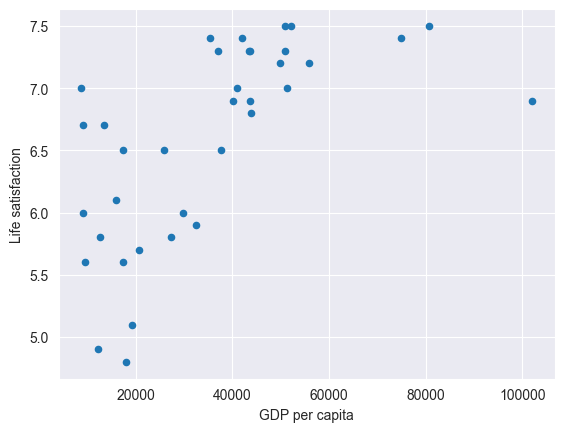

In [5]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [6]:
model = LinearRegression()

model.fit(X, y)

X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new)) # 6.28

[[6.28653637]]


In [9]:
model = KNeighborsRegressor(n_neighbors=3)

model.fit(X, y)

X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new)) # 5.77

[[5.76666667]]
